<a href="https://colab.research.google.com/github/Aminfaraji/ABINetpaddleocr/blob/main/ABINetpaddleocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !nvidia-smi
# !pip install xformers==v0.0.22
# !pip install mmcv-full==1.3.13 -f https://download.openmmlab.com/mmcv/dist/cu102/torch1.9.0/index.html


In [ ]:
# !python -m pip install paddlepaddle-gpu==2.4.1.post112 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
# !python -m pip install paddlepaddle-gpu==2.5.2.post102 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
!python3 -m pip install paddlepaddle-gpu==2.6.1.post120 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
!git clone https://github.com/PaddlePaddle/PaddleOCR.git
%cd /content/PaddleOCR
!pip install -r requirements.txt

In [1]:
%cd /content/PaddleOCR
!mkdir pretrained_model
%cd pretrained_model/
# !unzip /content/drive/MyDrive/IDPL2.zip
# !wget https://paddleocr.bj.bcebos.com/rec_r45_abinet_train.tar
# !tar -xf rec_r45_abinet_train.tar && rm -rf rec_r45_abinet_train.tar

/content/PaddleOCR
/content/PaddleOCR/pretrained_model


In [ ]:
!rm -rf /content/PaddleOCR/train_data

In [ ]:
# !mkdir /content/PaddleOCR/train_data
# !unzip /content/drive/MyDrive/IDPL-PFOD2-dataset/train.zip -d /content/PaddleOCR/train_data
# !unzip /content/drive/MyDrive/IDPL-PFOD2-dataset/val.zip -d /content/PaddleOCR/train_data
!cp /content/drive/MyDrive/IDPL-PFOD2-dataset/val.txt -r /content/PaddleOCR/train_data
!cp /content/drive/MyDrive/IDPL-PFOD2-dataset/train.txt -r /content/PaddleOCR/train_data


In [2]:
import cv2
import os
#from imutils import perspective
import numpy as np
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from imutils import perspective

In [3]:
# !python3 tools/train.py -c /content/PaddleOCR/pretrained_model/rec_r45_abinet_train/config.yml -o Global.pretrained_model=/content/PaddleOCR/pretrained_model/rec_r45_abinet_train/best_accuracy

In [4]:
# !python3 tools/train.py -c /content/PaddleOCR/pretrained_model/rec_r45_abinet_train/config.yml -o Global.pretrained_model=/content/PaddleOCR/pretrained_model/rec_r45_abinet_train/best_accuracy

In [ ]:
!python3 tools/train.py -c /content/PaddleOCR/pretrained_model/rec_r45_abinet_train/config.yml -o Global.pretrained_model=/content/PaddleOCR/pretrained_model/rec_r45_abinet_train/best_accuracy

[2024/06/15 09:37:21] ppocr INFO: Architecture : 
[2024/06/15 09:37:21] ppocr INFO:     Backbone : 
[2024/06/15 09:37:21] ppocr INFO:         name : ResNet45
[2024/06/15 09:37:21] ppocr INFO:     Head : 
[2024/06/15 09:37:21] ppocr INFO:         image_size : [32, 128]
[2024/06/15 09:37:21] ppocr INFO:         iter_size : 3
[2024/06/15 09:37:21] ppocr INFO:         max_length : 25
[2024/06/15 09:37:21] ppocr INFO:         name : ABINetHead
[2024/06/15 09:37:21] ppocr INFO:         use_lang : True
[2024/06/15 09:37:21] ppocr INFO:     Transform : None
[2024/06/15 09:37:21] ppocr INFO:     algorithm : ABINet
[2024/06/15 09:37:21] ppocr INFO:     in_channels : 3
[2024/06/15 09:37:21] ppocr INFO:     model_type : rec
[2024/06/15 09:37:21] ppocr INFO: Eval : 
[2024/06/15 09:37:21] ppocr INFO:     dataset : 
[2024/06/15 09:37:21] ppocr INFO:         data_dir : /content/data/val
[2024/06/15 09:37:21] ppocr INFO:         ext_op_transform_idx : 1
[2024/06/15 09:37:21] ppocr INFO:         label_f

In [6]:
%cd /content/PaddleOCR

/content/PaddleOCR


In [12]:
import numpy as np
# import pytesseract
import argparse
import imutils
import cv2

def remove_noise_and_smooth(img_path):

    # img = cv2.imread(img_path)
    img = cv2.cvtColor(img_path, cv2.COLOR_BGR2GRAY)

    # Applying erosion and dilation to remove the noise
    # img = cv2.bitwise_not(img)
    # kernel = np.ones((5, 5), np.uint8)
    # img = cv2.erode(img, kernel, iterations=1)
    # img = cv2.dilate(img, kernel, iterations=1)
    # show_wait_destroy('dilate', img)
    # img = cv2.bitwise_not(img)

    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    img = cv2.bitwise_or(img, closing)
    # show_wait_destroy('bitwise_or', img)

    # img = apply_threshold(img, 1)
    # show_wait_destroy('threshold', img)
    # img = smooth_image(img)

    return img

def apply_threshold(img, argument):
    switcher = {
        1: cv2.threshold(cv2.GaussianBlur(img, (9, 9), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        2: cv2.threshold(cv2.GaussianBlur(img, (7, 7), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        3: cv2.threshold(cv2.GaussianBlur(img, (1, 1), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        4: cv2.threshold(cv2.GaussianBlur(img, (1, 1), 0), 20, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        5: cv2.threshold(cv2.medianBlur(img, 5), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        6: cv2.threshold(cv2.medianBlur(img, 3), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        7: cv2.adaptiveThreshold(cv2.GaussianBlur(img, (5, 5), 0), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2),
        8: cv2.adaptiveThreshold(cv2.medianBlur(img, 3), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2),
        9: cv2.threshold(img, 80, 255,   cv2.THRESH_BINARY )[1]
    }
    return switcher.get(argument, "Invalid method")

def smooth_image(img):
    # Apply blur to smooth out the edges
    blur_img = cv2.GaussianBlur(img, (1, 1), 2)
    # show_wait_destroy('blur', blur_img)

    return blur_img

In [24]:
path_img = '/content/drive/MyDrive/data/test/10.jpg'
image = cv2.imread(path_img)
image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
# img = remove_noise_and_smooth(image)
threshold = apply_threshold(image , 9)
# # # threshold  = apply_threshold(threshold ,3)
# # # smooth_ = smooth_image(threshold)

In [25]:
cv2.imwrite('/content/threshold.jpg' , threshold)

True

In [52]:
!python3 tools/infer_rec.py -c /content/drive/MyDrive/save_model_ABINet/config.yml -o Global.infer_img='/content/drive/MyDrive/data/test/10.jpg' Global.pretrained_model=/content/drive/MyDrive/save_model_ABINet/best_accuracy

[2024/06/16 09:14:53] ppocr INFO: Architecture : 
[2024/06/16 09:14:53] ppocr INFO:     Backbone : 
[2024/06/16 09:14:53] ppocr INFO:         name : ResNet45
[2024/06/16 09:14:53] ppocr INFO:     Head : 
[2024/06/16 09:14:53] ppocr INFO:         image_size : [32, 128]
[2024/06/16 09:14:53] ppocr INFO:         iter_size : 3
[2024/06/16 09:14:53] ppocr INFO:         max_length : 25
[2024/06/16 09:14:53] ppocr INFO:         name : ABINetHead
[2024/06/16 09:14:53] ppocr INFO:         use_lang : True
[2024/06/16 09:14:53] ppocr INFO:     Transform : None
[2024/06/16 09:14:53] ppocr INFO:     algorithm : ABINet
[2024/06/16 09:14:53] ppocr INFO:     in_channels : 3
[2024/06/16 09:14:53] ppocr INFO:     model_type : rec
[2024/06/16 09:14:53] ppocr INFO: Eval : 
[2024/06/16 09:14:53] ppocr INFO:     dataset : 
[2024/06/16 09:14:53] ppocr INFO:         data_dir : /content/data/val
[2024/06/16 09:14:53] ppocr INFO:         ext_op_transform_idx : 1
[2024/06/16 09:14:53] ppocr INFO:         label_f

In [ ]:
!unzip /content/drive/MyDrive/withoutbackground.zip

In [21]:
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
info_image = pd.read_excel('/content/without background/Identity Card2/info.xlsx')
info_image

,x_coord,y_coord,W,H,text,filename
0,675,216,230,40,6304404347,C07B0S12161.jpg
1,800,300,105,35,کامشاد,C07B0S12161.jpg
2,821,370,84,35,امیری,C07B0S12161.jpg
3,723,438,182,35,1341 / 4 / 11,C07B0S12161.jpg
4,849,505,56,35,کیا,C07B0S12161.jpg
...,...,...,...,...,...,...
2761,830,300,75,35,ژیلا,C07B0S22621.jpg
2762,835,370,70,35,پستا,C07B0S22621.jpg
2763,737,438,168,35,1327 / 9 / 9,C07B0S22621.jpg
2764,835,505,70,35,بهبد,C07B0S22621.jpg


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

# بارگذاری فایل اکسل
file_path = '/content/without background/Identity Card2/info.xlsx'  # مسیر فایل اکسل شما
df = pd.read_excel(file_path)

# تنظیم نسبت‌ها
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

# تقسیم داده‌ها به train و temp
train_data, temp_data = train_test_split(df, test_size=1 - train_ratio)

# تقسیم داده‌های temp به validation و test
validation_data, test_data = train_test_split(temp_data, test_size=test_ratio / (test_ratio + validation_ratio))

# ذخیره داده‌ها به فایل‌های اکسل جداگانه
train_data.to_excel('train_data.xlsx', index=False)
validation_data.to_excel('validation_data.xlsx', index=False)
test_data.to_excel('test_data.xlsx', index=False)

print("Data has been split into train, validation, and test sets.")


Data has been split into train, validation, and test sets.


In [63]:
path_image = '/content/without background/Identity Card2/img/'
S = pd.read_excel('/content/test_data.xlsx')
for i in range(len(S)):
  x,y,w,h = S.iloc[i][:4]
  filename = S.iloc[i].filename
  image = cv2.imread(path_image+filename)
  crop_image = image[y-2:y+h , x-2:x+w+10]
  cv2.imwrite('/content/drive/MyDrive/data/test/'+str(i)+'.jpg' , crop_image)

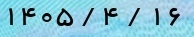

In [62]:
img = cv2.imread('/content/drive/MyDrive/data/valid/312.jpg')
cv2_imshow(img)

In [52]:
import pandas as pd

# بارگذاری فایل اکسل
file_path = '/content/validation_data.xlsx'  # مسیر فایل اکسل شما
df = pd.read_excel(file_path)
selected_column = df['text']
# ذخیره داده‌ها در فایل متنی
output_txt_path = '/content/drive/MyDrive/data/valid.txt'  # مسیر فایل متنی خروجی

with open(output_txt_path, 'w', encoding='utf-8') as f:
    for index, value in selected_column.items():
        value = value.replace(' ','')
        f.write(f"{str(index)+'.jpg'}\t{value}\n")

print(f"Data has been written to {output_txt_path}")

Data has been written to /content/drive/MyDrive/data/valid.txt


In [49]:
pd.read_excel('/content/test_data.xlsx')

,x_coord,y_coord,W,H,text,filename
0,849,505,56,35,کیا,C07B0S12161.jpg
1,723,565,182,35,1402 / 7 / 30,C07B0S22615.jpg
2,709,438,196,35,1337 / 11 / 18,C07B0S12284.jpg
3,737,565,168,35,1404 / 4 / 1,C07B0S12187.jpg
4,800,300,105,35,کیقباد,C07B0S12357.jpg
...,...,...,...,...,...,...
410,723,565,182,35,1401 / 8 / 29,C07B0S22496.jpg
411,807,505,98,35,آریانا,C07B0S22590.jpg
412,849,505,56,35,گیو,C07B0S12262.jpg
413,675,216,230,40,1412089720,C07B0S22616.jpg
